In [280]:
import pandas as pd

ds1_cnfs = pd.read_csv(f"cnfs/ds1.csv", index_col="instance")
ds2_cnfs = pd.read_csv(f"cnfs/ds2.csv", index_col="instance")
ds_stat = pd.read_csv("results/ds_random_cnfs.csv", index_col=["dataset", "instance", "model", "method"])

means = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.mean())
mins = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.min())
maxs = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.max())

In [281]:
import matplotlib.pyplot as plt 
import matplotlib 
plt.rcParams.update({ 
    "text.usetex": True,  
    "font.size": 12,
    "figure.figsize": (11, 2.5) ,
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'pgf.rcfonts': False
})

use_pgf = True 
if use_pgf: matplotlib.use("pgf")
else: matplotlib.use("module://matplotlib_inline.backend_inline")

def make_comp_fig():
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_ylabel("Time [ms]")
    ax1.set_yscale("log")
    ax2.set_yscale("log")
    ax1.set_xlabel("Number of variables")
    ax2.set_xlabel("Number of variables")
    ax1.grid(True)
    ax2.grid(True)
    return fig, (ax1, ax2)

fmt_ctr = 0
def iter_fmt():
    global fmt_ctr
    fmts = ["o", "x", "1", "s", "+", "p"]
    lines = ["--","-", "-.", ":"]
    fmt = fmts[fmt_ctr%len(fmts)] + lines[fmt_ctr%len(lines)]
    fmt_ctr += 1
    return fmt

def plot(axs, means, maxs, mins, model, method, label, with_error=False, int_ticks=True, parsing=False):
    fmt = iter_fmt()
    for ds, ax in zip(["ds1", "ds2"], axs):
        if ax is None: continue
        instances = means.loc[(ds, model, method), "n"]
        # plt.xticks(instances)
        if int_ticks: instances = list(map(lambda it: f"${int(it)}$", instances.index))
        times_mean = means.loc[(ds, model, method), "ot"]
        times_mins = mins.loc[(ds, model, method), "ot"]
        times_maxs = maxs.loc[(ds, model, method), "ot"]
        if parsing:
            times_mean = times_mean - means.loc[(ds, model, method), "mt"]
            times_mins = times_mins - mins.loc[(ds, model, method), "mt"]
            times_maxs = times_maxs - maxs.loc[(ds, model, method), "mt"]

        if with_error:
            ax.errorbar(
                instances,
                times_mean, 
                yerr=[times_mean-times_mins, times_maxs-times_mean], 
                fmt=fmt, label=label, barsabove=True)
        else:
            ax.errorbar(
                instances, 
                times_mean, 
                fmt=fmt, label=label)

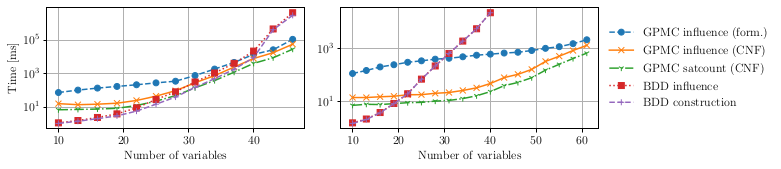

In [282]:
fig, axs = make_comp_fig()
plot(axs, means, maxs, mins, "GPMC", "influence", label="GPMC influence (form.)", int_ticks=False)
plot(axs, means, maxs, mins, "GPMC", "raw_influence", label="GPMC influence (CNF)", int_ticks=False)
plot(axs, means, maxs, mins, "GPMC", "raw_satcount", label="GPMC satcount (CNF)", int_ticks=False)
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "tseitin", label="GPMC/tseitin")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "blame", label="GPMC: Blame")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "mblame", label="GPMC: Modified Blame")
plot(axs, means, maxs, mins, "BDD", "influence", label="BDD influence", int_ticks=False)
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", label="BuDDy: Satcount")
plot(axs, means, maxs, mins, "BDD", "influence", label="BDD construction", parsing=True, int_ticks=False)
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", label="BuDDy: Satcount")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "blame", label="BuDDy: Blame")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "mblame", label="BuDDy: Modified Blame")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "dominating_cgm", label="BuDDy: Dominating CGM")
axs[1].legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/influence_ot.pgf")
else: plt.show()

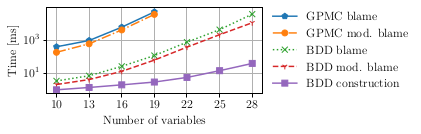

In [283]:
fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.set_ylabel("Time [ms]")
ax.set_yscale("log")
ax.set_xlabel("Number of variables")
ax.grid(True)
axs = (ax, None)

plot(axs, means, maxs, mins, "GPMC", "blame", label="GPMC blame")
plot(axs, means, maxs, mins, "GPMC", "mblame", label="GPMC mod. blame")
# plot(axs, means, maxs, mins, "GPMC", "satcount", label="GPMC: Satcount")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD blame")
plot(axs, means, maxs, mins, "BDD", "mblame", label="BDD mod. blame")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD construction", parsing=True)
# plot(axs, means, maxs, mins, "BDD", "satcount", label="BDD: Satcount")
ax.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/blame_single.pgf")
else: plt.show()

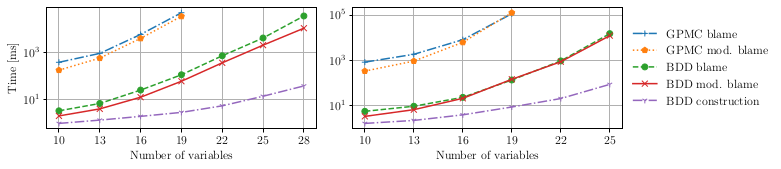

In [284]:
fig, axs = make_comp_fig()
plot(axs, means, maxs, mins, "GPMC", "blame", label="GPMC blame")
plot(axs, means, maxs, mins, "GPMC", "mblame", label="GPMC mod. blame")
# plot(axs, means, maxs, mins, "GPMC", "satcount", label="GPMC: Satcount")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD blame")
plot(axs, means, maxs, mins, "BDD", "mblame", label="BDD mod. blame")
plot(axs, means, maxs, mins, "BDD", "blame", label="BDD construction", parsing=True)
# plot(axs, means, maxs, mins, "BDD", "satcount", label="BDD: Satcount")
axs[1].legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/blame_ot.pgf")
else: plt.show()

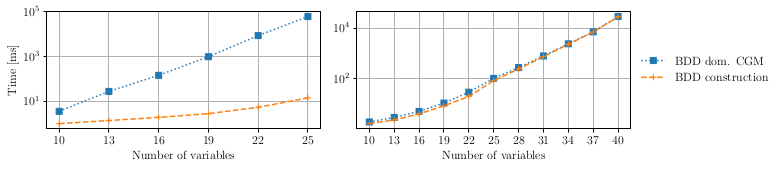

In [285]:
fig, axs = make_comp_fig()
plot(axs, means, maxs, mins, "BDD", "dominating_cgm", label="BDD dom. CGM", int_ticks=True)
plot(axs, means, maxs, mins, "BDD", "dominating_cgm", label="BDD construction", int_ticks=True, parsing=True)
axs[1].legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
fig.tight_layout()
if use_pgf: plt.savefig(f"pics/dominating_cgm_ot.pgf")
else: plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


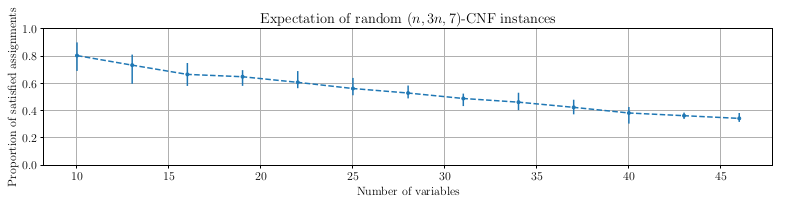

In [286]:
# Expected values
ds = ds1_cnfs # ds2 too low expectations

means = ds[["n","expectation"]].groupby("n").apply(lambda group: group.mean())
mins = ds[["n","expectation"]].groupby("n").apply(lambda group: group.min())
maxs = ds[["n","expectation"]].groupby("n").apply(lambda group: group.max())
ys, yslow, yshigh = means["expectation"], mins["expectation"], maxs["expectation"]
plt.errorbar(
    means["n"], 
    ys, yerr=[ ys - yslow, yshigh - ys ], 
    fmt=".--")

plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
plt.grid(True)
plt.tight_layout()
plt.ylim((0,1))
plt.xlabel("Number of variables")
plt.ylabel("Proportion of satisfied assignments")
plt.title("Expectation of random $(n, 3n, 7)$-CNF instances")
plt.yscale("linear")

if use_pgf: plt.savefig("pics/expected_value_ot_ds1.pgf")
else: plt.show()

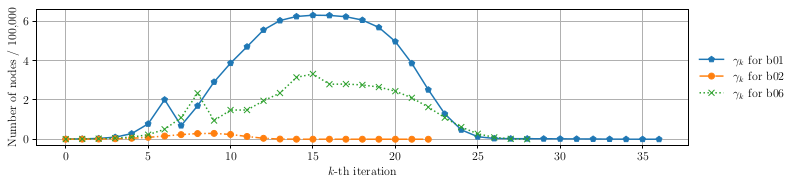

In [287]:
# BDD sizes
df_sizes = pd.read_csv("results/blame_bdd_sizes.csv", index_col=["instance", "k"])
for b in ["b01", "b02", "b06"]:
    # index = [f"${int(idx)}$" for idx in df_sizes.loc[b].index]
    index = df_sizes.loc[b].index 
    plt.plot(index, df_sizes.loc[b]["BDD_size"] / 100000, iter_fmt(), label=f"$\gamma_k$ for {b}")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1, shadow=False, framealpha=0, edgecolor="1")
plt.grid(True)
plt.tight_layout()
plt.xlabel("$k$-th iteration")
plt.ylabel("Number of nodes / 100,000")
plt.yscale("linear")
# plt.title("BDD nodes vs. progress of blame computation")
if use_pgf: plt.savefig("pics/bdd_nodes_blame.pgf")
else: plt.show()